# Аналитика сети фитнес центров 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Проверка-на-дубли-и-пропуски" data-toc-modified-id="Проверка-на-дубли-и-пропуски-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка на дубли и пропуски</a></span></li><li><span><a href="#Статописание-признаков" data-toc-modified-id="Статописание-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Статописание признаков</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-рекомендации-по-работе-с-клиентами-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы и рекомендации по работе с клиентами</a></span></li></ul></div>

**Описание проекта**

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

**Задачи**

- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами.

## EDA

### Получение данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.cluster.hierarchy import dendrogram, linkage 

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:
try: 
    df = pd.read_csv('datasets/gym_churn.csv')
except:
    df = pd.read_csv('/datasets/gym_churn.csv')

### Проверка на дубли и пропуски

In [3]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.duplicated().sum()

0

Размер датасета - 4000 наблюдений, 12 признаков, 1 целевая переменная. 

- Пропусков нет
- Дублей нет
- Типы данных подходящие

In [6]:
#приведем названия колонок к строчному виду
df.columns = [i.lower() for i in df.columns]

### Статописание признаков

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Выбросов нет.

In [8]:
#исследуем различия между групппами с разными значениями оттока
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Различия в параметрах для клиентов, которые ушли:
- Средний near location ниже, гипотеза - чем дальше от фитнес-центра, тем больше отток.
- Реже приходили из партнеской компании и у них не было скидки.
- В 2 раза реже их приводили друзья
- Короче действие абонемента (contract period)
- Ниже средний возраст
- Реже посещали груповые занятия
- Меньше дополнительные чеки
- существенно меньше лайфтайм (почти в 5 раз)
- Реже посещают зал (в последнем месяце - в 2 раза реже).

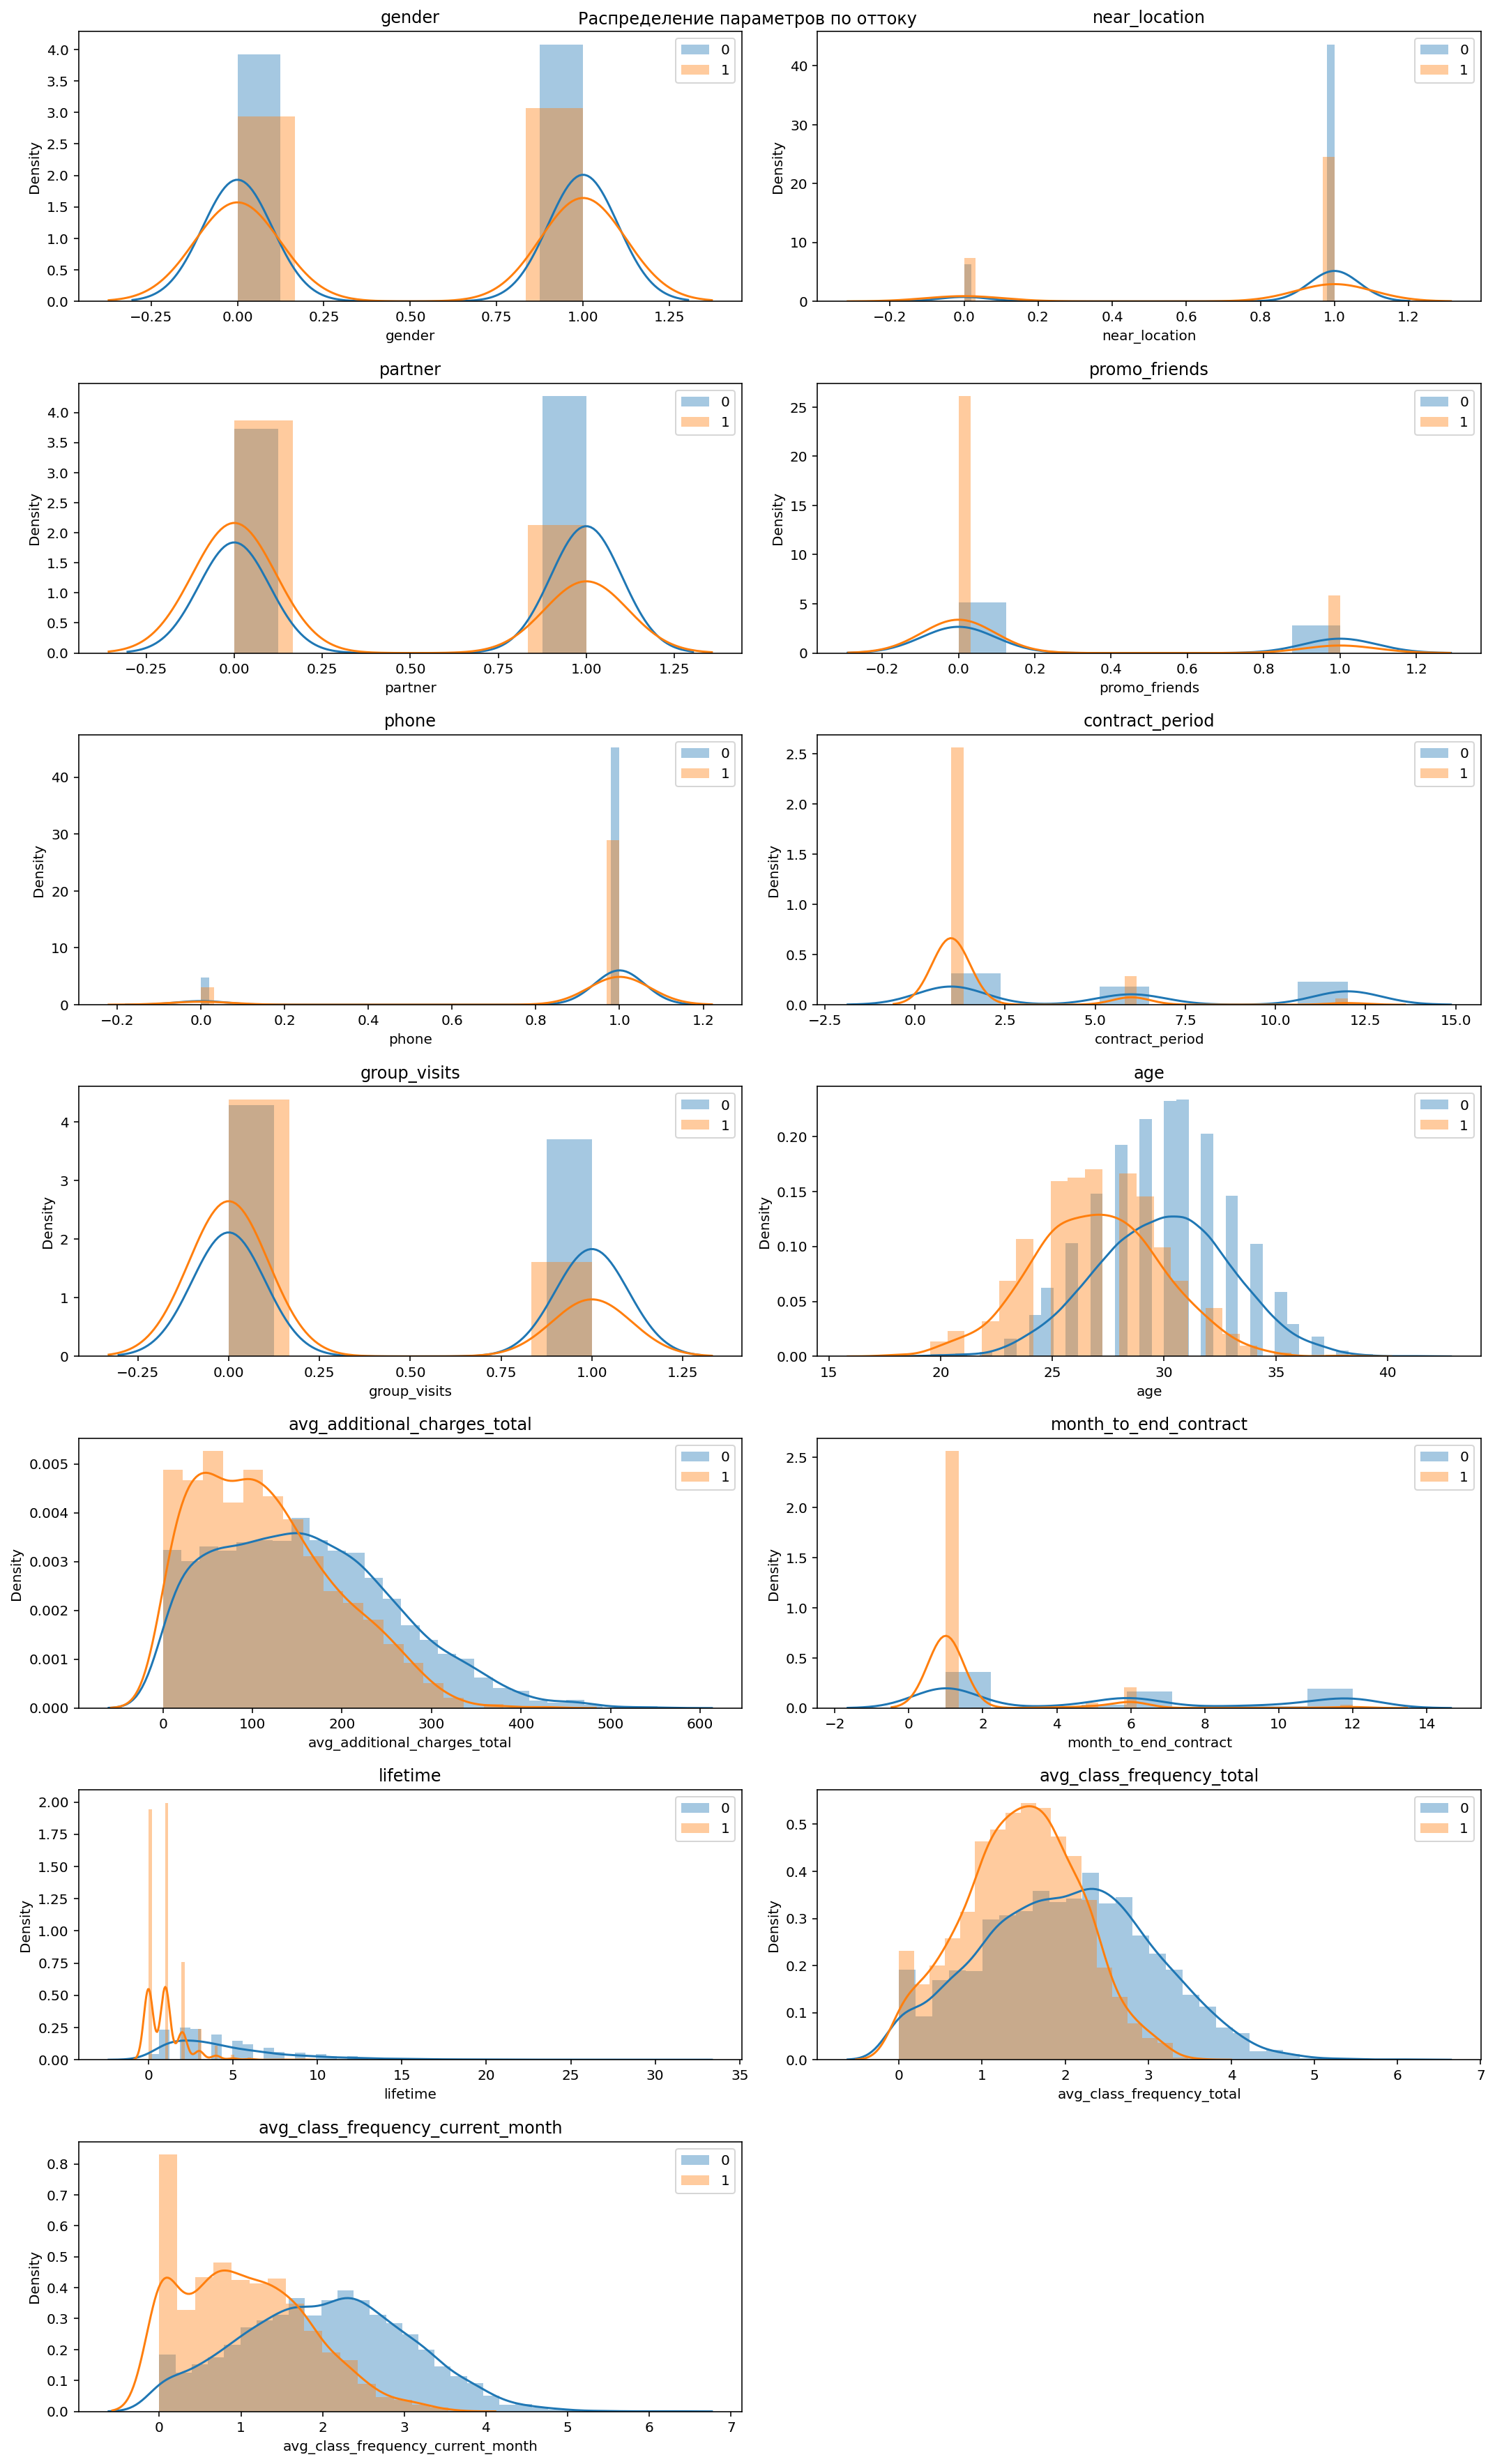

In [9]:
#построим распределение небинарных параметров по оттоку
features=df.columns.drop('churn')

plt.figure(figsize=(15, 25))
for i,j in enumerate(features):
    for c in df['churn'].unique():
        df_1=df.query('churn == @c')
        sns.distplot(df_1[j], label = c, ax=plt.subplot(7,2,i+1))
    plt.title(j)
    plt.legend()
plt.suptitle('Распределение параметров по оттоку')    
plt.tight_layout()


Дополнение к выводам выше:
- У тех, кто уходит, чаще были небольшие дополнительные платежи
- В среднем те, кто ушли, ходили на занятия реже (1-2 раза) в неделю, но в последний месяц график разко меняется, частота посещений снижается. По этому параметру можно отслеживать тех, кто потенциально может уйти в следующем месяце.

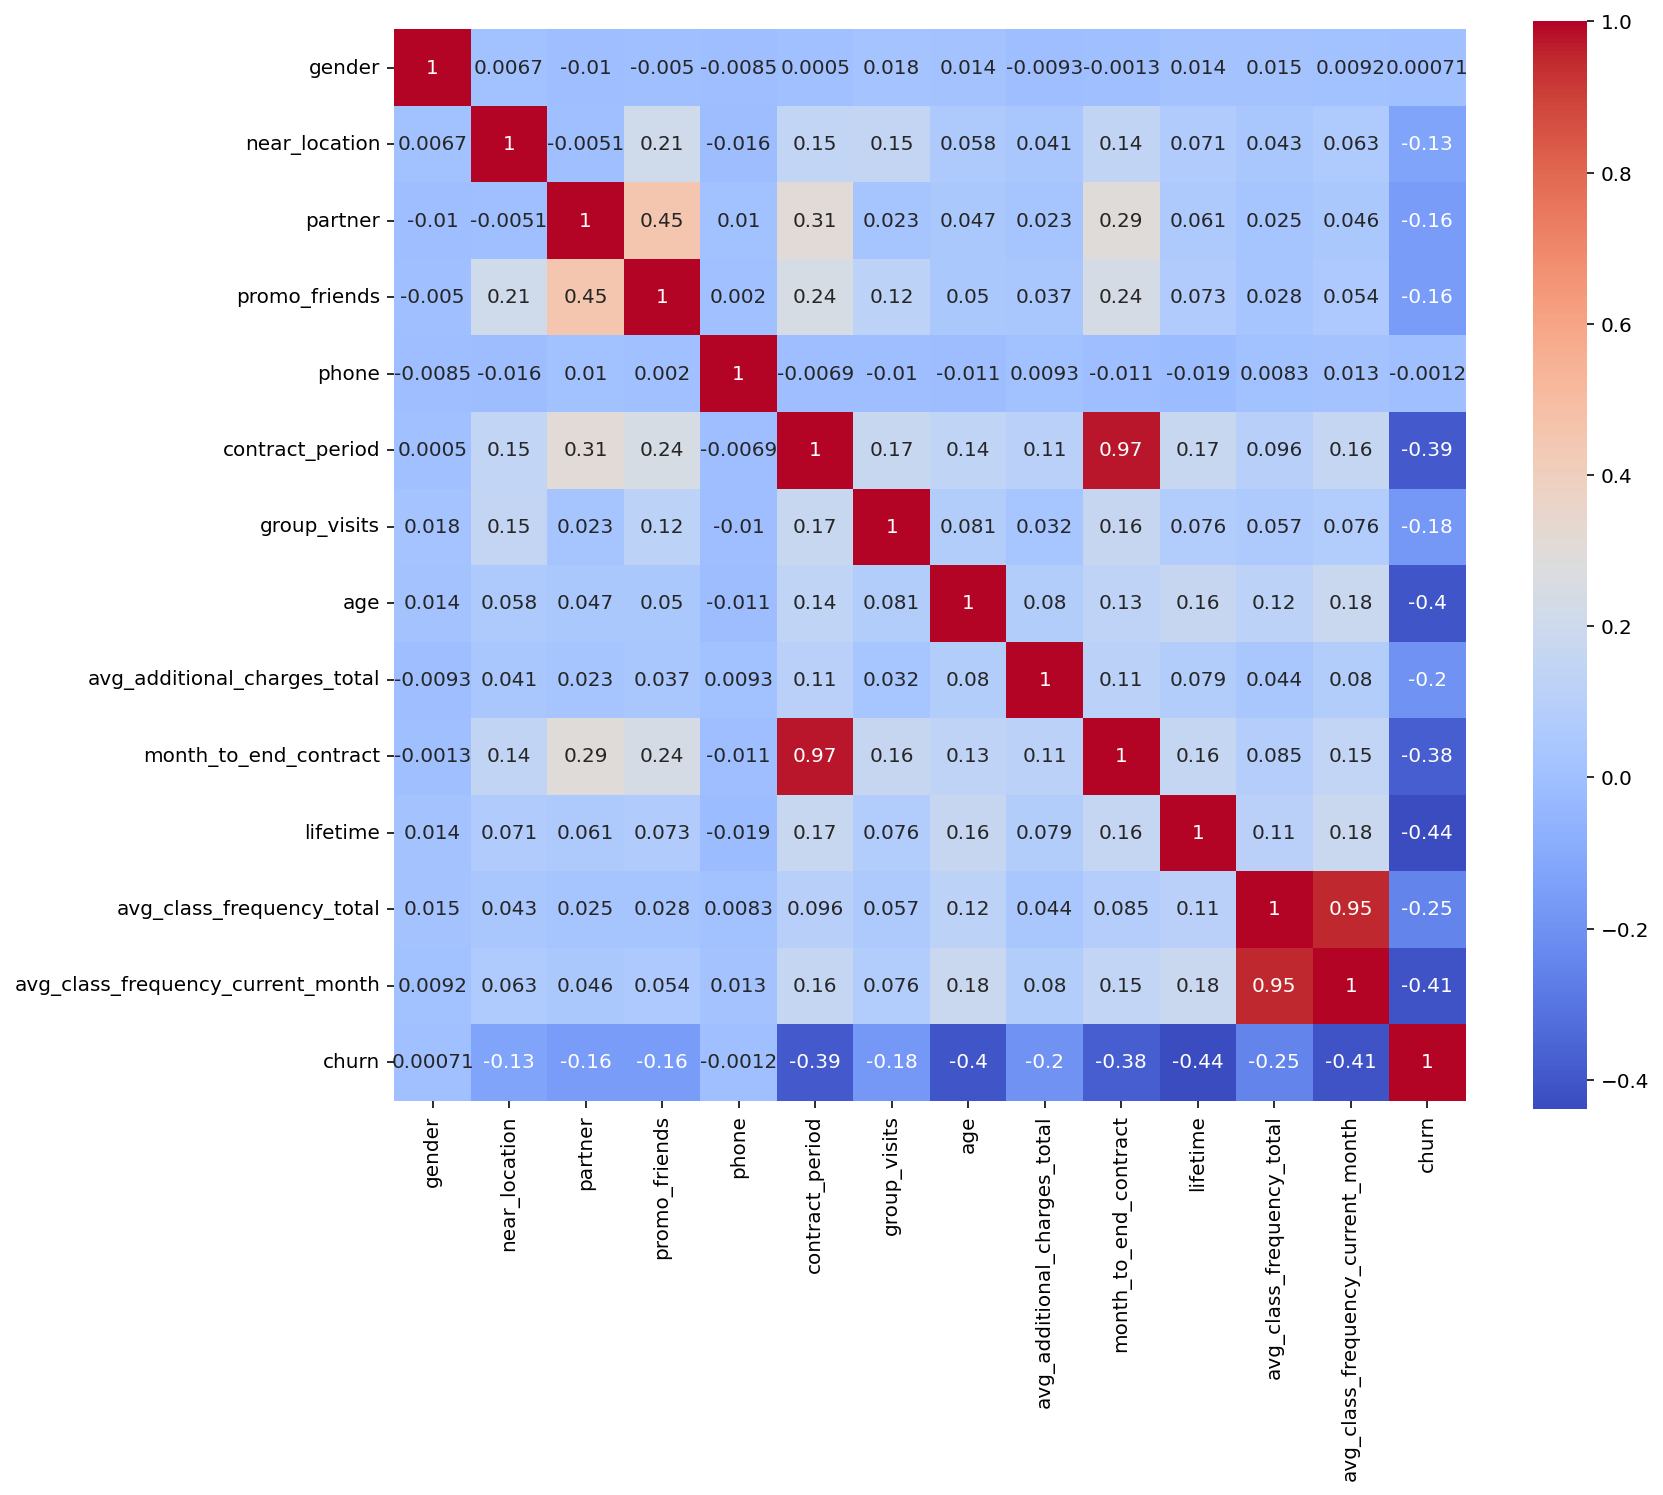

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Есть сильная положительная корреляция между:
- временем до окончания договора и сроком договора 
- среднем количеством занятий в неделю в общем и за последний месяц

Небольшая положительная корреляция между:
- принадлежностью к клубу-партнеру и рекомендацией друзей
- сроком договора и рекомендацией друзей

Небольшая отрицательная корреляция между оттоком и: 
- лайфтаймом, 
- временем до окончания договора, 
- возрастом, 
- сроком договора, 
- частотой посещения клуба в последний месяц. 


Для дальнейшей бинарной классификации необходимо удалить коррелирующие признаки, чтобы избежать мультиколлинеарности.
Уберем время до окончания срока договора и среднее количество занятий в целом.

In [11]:
df_noncorr = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.
 - выбираем random сплит, т.к. наши данные не изменяются во времени
 - выберем для бинарной классификации модели логистической регрессии и случайного леса

In [12]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = df_noncorr.drop('churn', axis=1)
y = df_noncorr['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# стандартизуем данные
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [13]:
# обучим модель методом логистической регрессии
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_y = lr_model.predict(X_test_st)

print ('Результаты логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_y)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_y)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_y)))

Результаты логистической регрессии
Accuracy: 0.90
Precision: 0.79
Recall: 0.82


In [14]:
# обучим модель методом случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_y = rf_model.predict(X_test_st)

print ('Результаты случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_y)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_y)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_y)))

Результаты случайного леса
Accuracy: 0.90
Precision: 0.81
Recall: 0.75


Accuracy обоих алгоритмов одинаковая.
У случайного леса выше Precision, но у логистической регрессии выше recall.

Для задачи удержания клиента лучше выбрать алгоритм логичестической регресии, где выше метрика recall - лучше дать плюшки, тому кто еще не прекращает посещения, чем пропустить того, кто уйдет. 
Однако в итоге все зависит от бюджета на удержание одного клиента - если он высокий, тогда лучше использовать модель случайного леса - у нее больше точность. 


## Кластеризация клиентов

In [15]:
# стандартизуем матрицу признаков
X_st = scaler.transform(X)

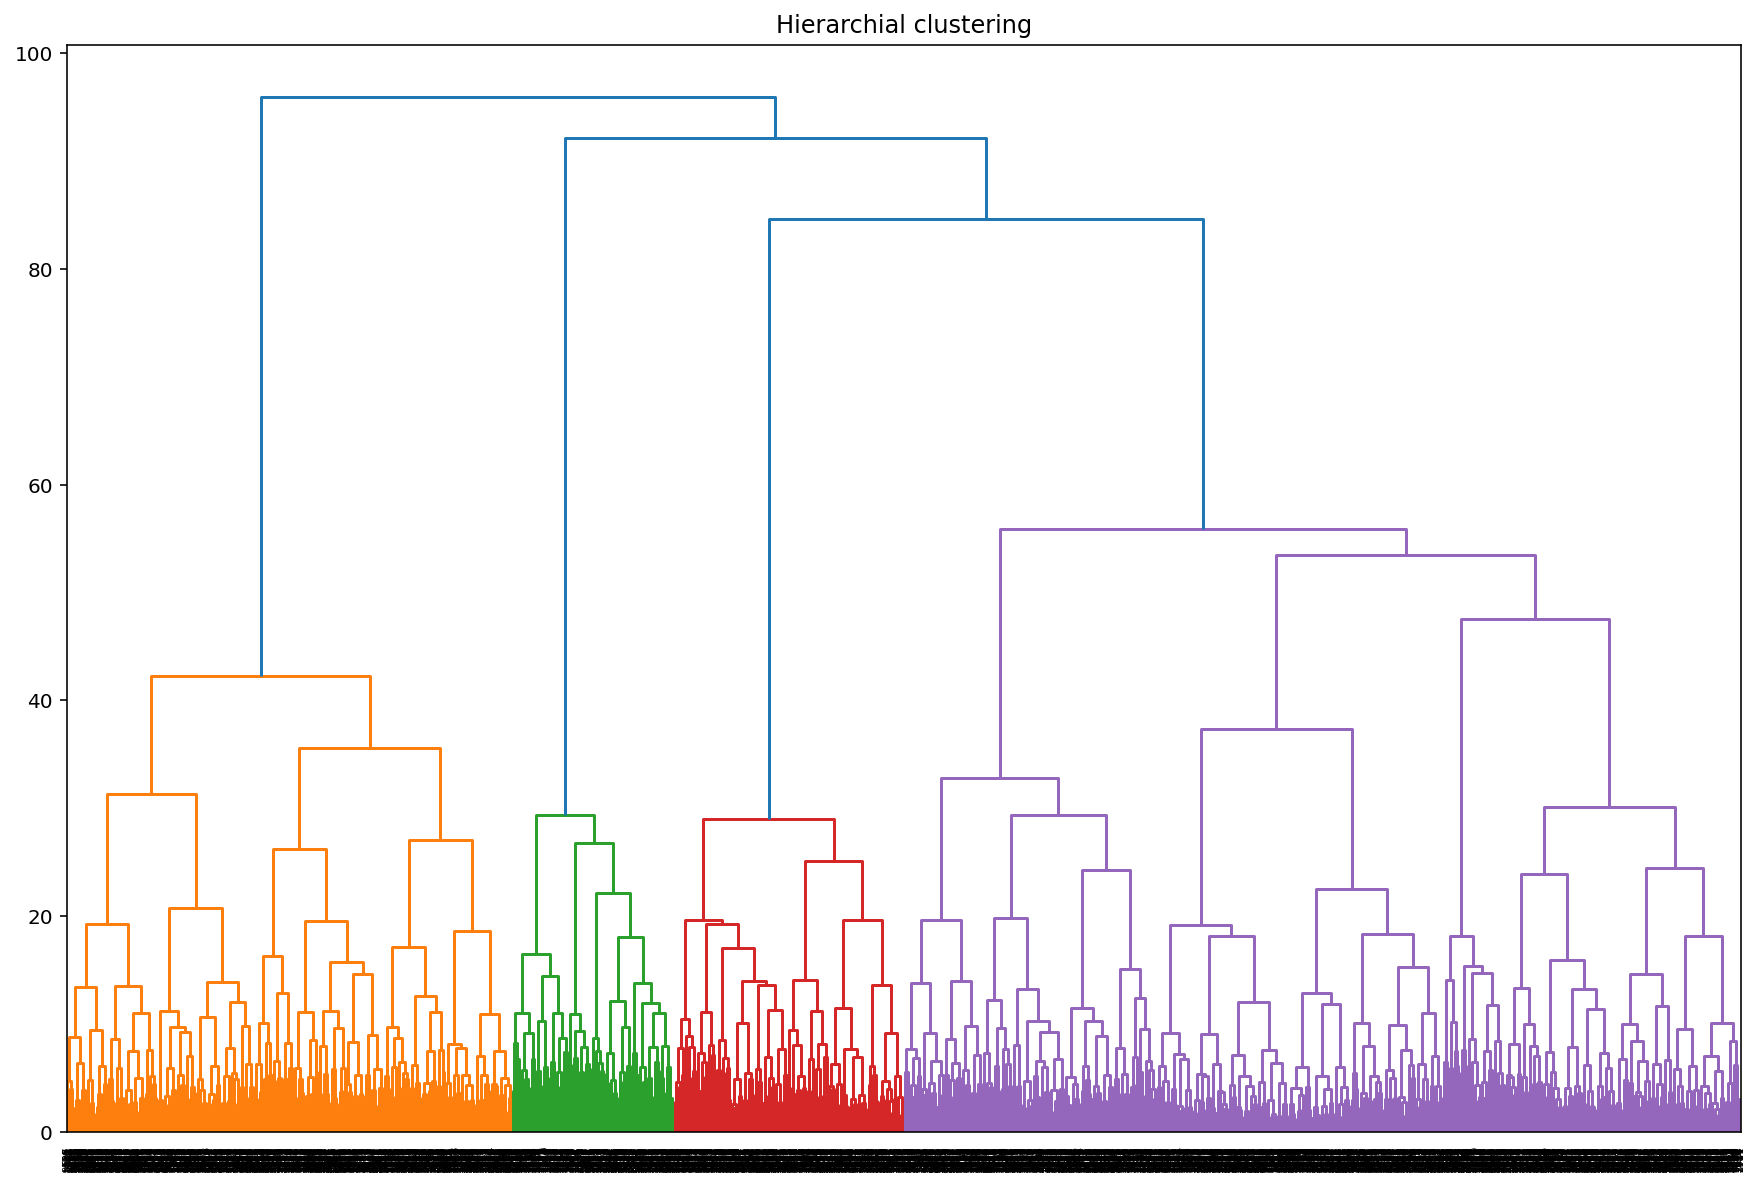

In [16]:
linked = linkage(X_st, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show() 

На основании графика можно выделить 4 кластера.
По заданию примем число кластеров = 5.

In [17]:
# кластеризация алгоритмом k-means

km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_st)

# сохраняем метки кластера в датасет
df['cluster_km'] = labels

In [18]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.497967,0.995935,0.897358,1.000000,1.0,6.913618,0.523374,29.570122,152.807198,6.327236,4.223577,1.962551,1.917736,0.123984
1,0.538217,0.995754,0.403397,0.014862,1.0,6.553079,0.525478,30.750531,176.467949,5.954352,5.628450,2.338126,2.341529,0.010616
2,0.498230,1.000000,0.202655,0.065487,1.0,1.976991,0.304425,27.753097,123.008219,1.910619,2.000000,1.488768,1.255554,0.531858
3,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.818996,2.974910,1.764122,1.597146,0.403226
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


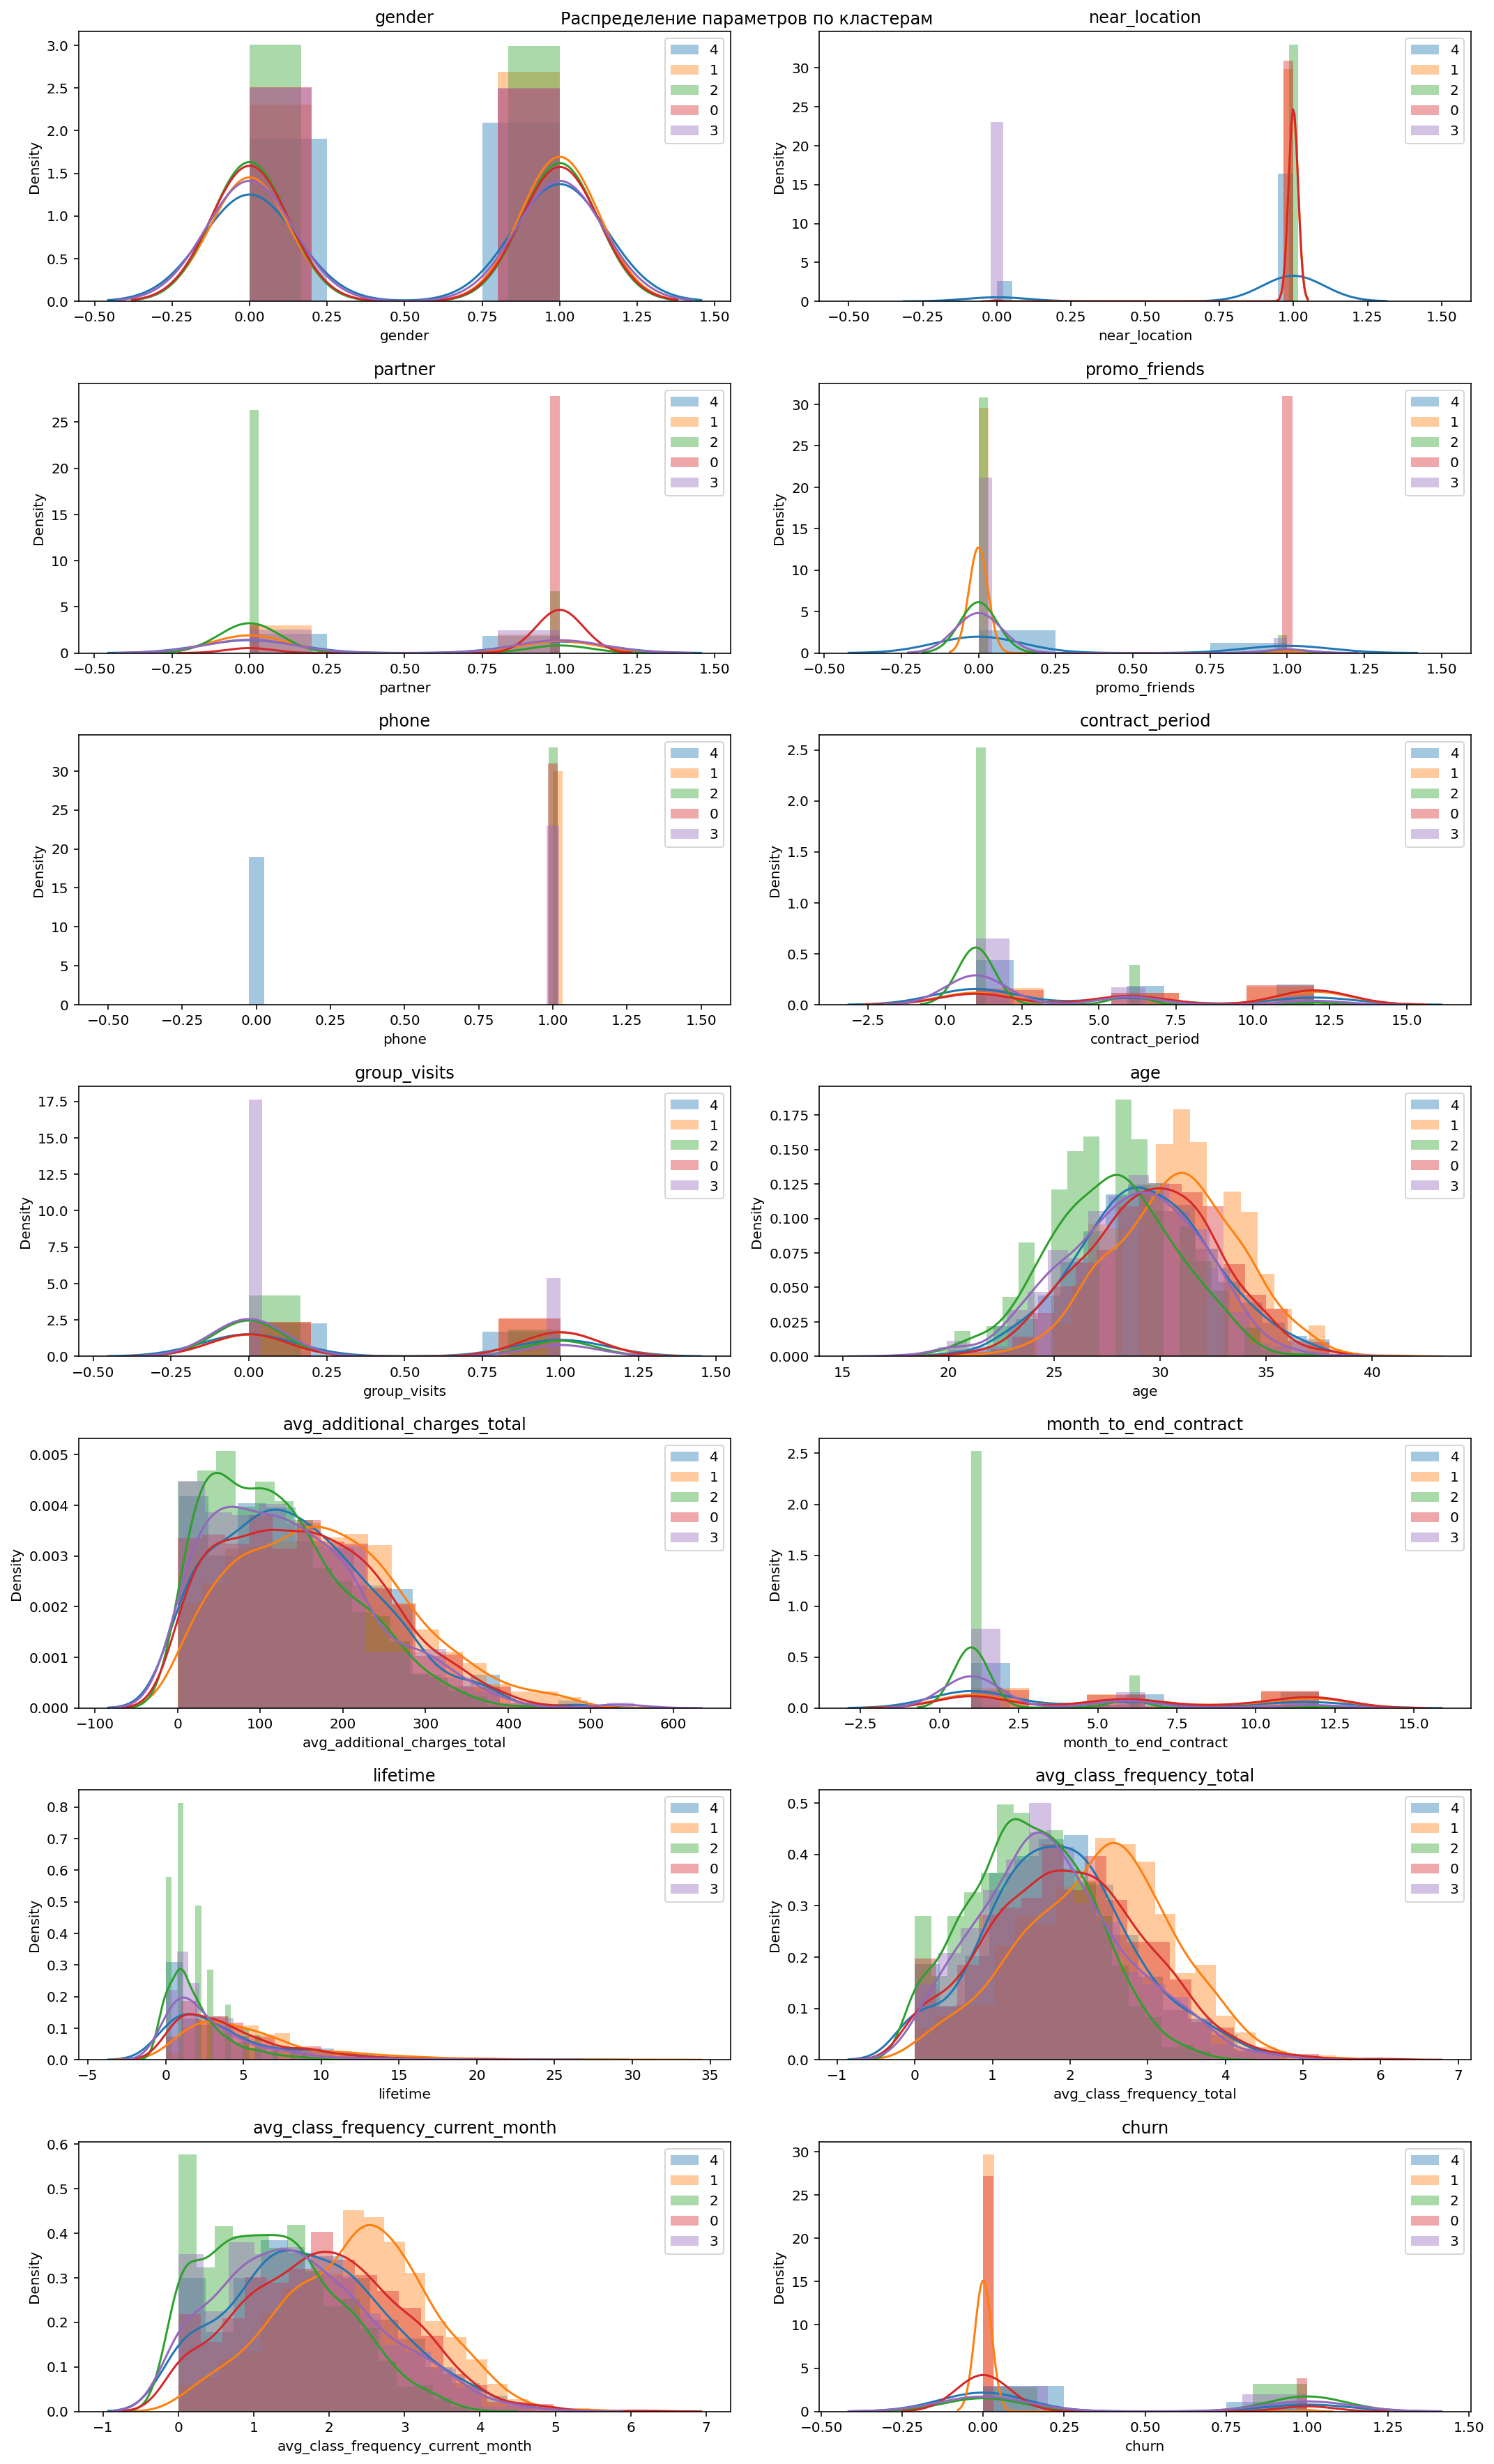

In [19]:
#построим распределение параметров по оттоку
features=df.columns.drop('cluster_km')

plt.figure(figsize=(15, 25))
for i,f in enumerate(features):
    for c in df['cluster_km'].unique():
        df_1=df.query('cluster_km == @c')
        sns.distplot(df_1[f], label = c, ax=plt.subplot(7,2,i+1), kde=True) #, hist=False)
    plt.title(f)
    plt.legend()
plt.suptitle('Распределение параметров по кластерам')    
plt.tight_layout()

Алгоритм достаточно четко разделил тех, кто остался и тех, кто ушел. 
В группах 0 и 1 - преимущественно оставшиеся пользователи.

- В группе 0 - пользователи с абонементами от партнеров и приведенные друзьями. 
- В группе 1 - пользователи постарше, и они чаще всего посещают занятия.
- В группе 2 - пользователи с месячным абонементом. 
- В группе 3 - те, от кого фитнес клуб далеко и нелюбители групповых занятий. 
- В группе 4 - те, кто не оставил телефон.


In [20]:
df.groupby('cluster_km')['churn'].mean().sort_values()

cluster_km
1    0.010616
0    0.123984
4    0.266839
3    0.403226
2    0.531858
Name: churn, dtype: float64

- Самые надежные клиенты - в группах 0 и 1. Видимо, лучше всего мотивируют рекомедации и личная ответственность. 
- Самые ненадежные клиенты в группе 2. Это пользователи с месячным абонементом, у которых фитнес находится рядом с домом. Возможно они купили абонемент "попробовать", сходили несколько раз и перестали. 

## Выводы и рекомендации по работе с клиентами

**В ходе исследования мы:**
- провели исследовательский анализ данных посетителей фитнес клуба
- построили 2 модели прогнозирования оттока пользователей с помощью двух алгоритмов
- сформировали типичные портреты клиентов при помощи кластеризации

**Выводы**
1. Самые надежные клиенты (у которых меньше отток) - пользователи с абонементами от партнеров и приведенные друзьями. 
2. Также достаточно надежны пользователи постарше, которые часто посещают занятия. У них же и самый высокий дополнительный чек.


3. Посетители с самой высокой степенью оттока - пользователи с коротким (на 1 месяц) абонементом. Они, как правило приходят в клуб без рекомендаций и редко ходят. 
4. Следующие по степени риска - клиенты, для которых фитнес-клуб не рядом с домом. Еще они как правило не ходят на групповые занятия.
**Рекомендации**

1. Расширять партнерские программы, чтобы привлекать целевых посетителей
2. Стимулировать клиентов к покупке более долгосрочных абонементов.
3. Отслеживать частоту посещениий (к моменту оттока она существенно снижается). При переходе некоторого порога (например, если частота снизилась в 2 раза) - связываться с клиентом и предлагать ему что-то для удержания или возвращения интереса (например занятия с тренером).